In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data Loading
data_path = '/content/drive/MyDrive/V5/CKD_India.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

print('Dataset loaded successfully.')
print('Shape:', df.shape)

Dataset loaded successfully.
Shape: (1100, 26)


In [4]:
new_df = df.copy()

In [5]:
new_df.columns = [
    'id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
    'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class'
]

In [6]:
# backup of this table to do before or after comparisons on data cleaning
new_df_bef = new_df.copy()

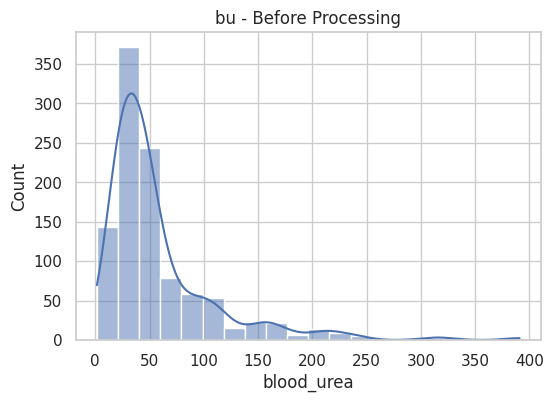

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Before (using the original df dataframe)
plt.figure(figsize=(6,4))
sns.histplot(new_df['blood_urea'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title('bu - Before Processing')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = new_df.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

print("Min-Max scaling applied to numerical columns.")
display(new_df.head())

Min-Max scaling applied to numerical columns.


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0.255639,0.170455,0.076923,0.25,0.0,0.0,NaN,normal,notpresent,notpresent,0.149573,0.078306,0.022487,0.861199,0.038202,0.734694,52,7000,NaN,no,no,no,good,no,no,ckd
1,0.872180,0.409091,0.230769,0.75,0.0,0.0,normal,normal,notpresent,notpresent,0.164530,0.044929,0.001323,0.899054,0.022472,0.714286,44,7300,6.4,no,no,no,good,no,no,notckd
2,0.676692,0.238636,0.230769,1.00,0.0,0.0,normal,normal,notpresent,notpresent,0.190171,0.083440,0.009259,0.886435,0.033708,0.761905,41,7200,5.0,no,no,no,good,no,no,notckd
3,0.265664,0.545455,0.307692,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,0.143162,0.299101,0.075397,0.772871,0.042697,0.197279,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,0.177945,0.500000,0.076923,0.25,0.2,0.0,normal,normal,notpresent,notpresent,0.301282,0.232349,0.038360,0.861199,0.033708,0.455782,28,14600,3.2,yes,yes,no,good,no,no,ckd


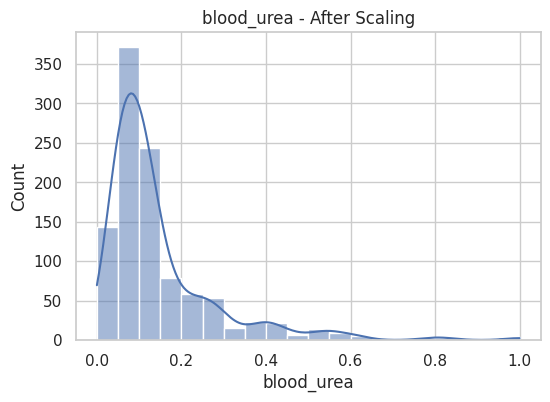

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# After (using the processed new_df with numeric values)
plt.figure(figsize=(6,4))
# Use histplot for numeric data
sns.histplot(new_df['blood_urea'], bins=20, kde=True)
plt.title('blood_urea - After Scaling')
plt.show()